<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.
 


In [ ]:
# Install tidymodels if you haven't done so
# install.packages("rlang")
# install.packages("tidymodels")

**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [ ]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [3]:
import requests
import tarfile

# Set the URL for the NOAA Weather Dataset
URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'

# Set the file name for the downloaded file
downloaded_file = 'noaa-weather-sample-data.tar.gz'

# Download the file using requests
response = requests.get(URL)
with open(downloaded_file, 'wb') as f:
    f.write(response.content)


Untar the zipped file.


In [4]:
# Untar the zipped file
with tarfile.open(downloaded_file, 'r:gz') as tar:
    tar.extractall()

# Optionally, you can remove the downloaded file after untarring
import os
os.remove(downloaded_file)


<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [5]:
import pandas as pd

# Specify the file name
file_name = 'noaa-weather-sample-data/jfk_weather_sample.csv'

# Read the dataset into a dataframe
df = pd.read_csv(file_name)


Next, display the first few rows of the dataframe.


In [6]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())


First few rows of the dataframe:
                   DATE HOURLYDewPointTempF  HOURLYRelativeHumidity  \
0  2015-07-25T13:51:00Z                  60                    46.0   
1  2016-11-18T23:51:00Z                  34                    48.0   
2  2013-01-06T08:51:00Z                  33                    89.0   
3  2011-01-27T16:51:00Z                  18                    48.0   
4  2015-01-03T12:16:00Z                  27                    61.0   

   HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF HOURLYPrecip  HOURLYWindSpeed  \
0                83.0                68.0         0.00             13.0   
1                53.0                44.0         0.00              6.0   
2                36.0                35.0         0.00             13.0   
3                36.0                30.0         0.00             14.0   
4                39.0                34.0            T             11.0   

   HOURLYSeaLevelPressure  HOURLYStationPressure  
0                   30.01             

Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [7]:
# Glimpse of the dataset
print("\nGlimpse of the dataset:")
print(df.info())

# Ensure the dataset has about 5700 rows and 9 columns
print(f"\nShape of the dataset: {df.shape}")


Glimpse of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    5727 non-null   object 
 1   HOURLYDewPointTempF     5576 non-null   object 
 2   HOURLYRelativeHumidity  5576 non-null   float64
 3   HOURLYDRYBULBTEMPF      5576 non-null   float64
 4   HOURLYWETBULBTEMPF      5573 non-null   float64
 5   HOURLYPrecip            4067 non-null   object 
 6   HOURLYWindSpeed         5571 non-null   float64
 7   HOURLYSeaLevelPressure  4983 non-null   float64
 8   HOURLYStationPressure   5569 non-null   float64
dtypes: float64(6), object(3)
memory usage: 402.8+ KB
None

Shape of the dataset: (5727, 9)


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [8]:
# Select subset of columns
selected_columns = [
    'HOURLYRelativeHumidity',
    'HOURLYDRYBULBTEMPF',
    'HOURLYPrecip',
    'HOURLYWindSpeed',
    'HOURLYStationPressure'
]

# Create a new dataframe with the selected columns
selected_df = df[selected_columns]

Show the first 10 rows of this new dataframe.


In [9]:
# Display the first 10 rows of the new dataframe
print("First 10 rows of the modified dataframe:")
print(selected_df.head(10))

First 10 rows of the modified dataframe:
   HOURLYRelativeHumidity  HOURLYDRYBULBTEMPF HOURLYPrecip  HOURLYWindSpeed  \
0                    46.0                83.0         0.00             13.0   
1                    48.0                53.0         0.00              6.0   
2                    89.0                36.0         0.00             13.0   
3                    48.0                36.0         0.00             14.0   
4                    61.0                39.0            T             11.0   
5                    79.0                41.0         0.00              6.0   
6                    51.0                19.0         0.00              0.0   
7                    65.0                24.0         0.00             11.0   
8                    90.0                54.0         0.06             11.0   
9                    94.0                73.0          NaN              5.0   

   HOURLYStationPressure  
0                  29.99  
1                  30.03  
2       

<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [14]:
import pandas as pd

# Inspect unique values in the 'HOURLYPrecip' column
unique_values_precip = selected_df['HOURLYPrecip'].unique()
print("Unique values in the 'HOURLYPrecip' column before cleanup:")
print(unique_values_precip)

Unique values in the 'HOURLYPrecip' column before cleanup:
['0.00' '0.0' '0.06' nan '0.03' '0.02' '0.08' '0.01' '0.07' '0.16' '0.09'
 '0.22' '0.24' '0.18' '0.05' '0.04' '0.11' '0.14' '0.25' '0.10' '0.58'
 '0.12' '0.13' '0.46' '1.07' '1.19' '0.34' '0.20' '0.36' '0.42' '0.17'
 '0.27' '0.35' '0.31' '0.33' '0.23' '0.26' '0.28' '0.75' '0.19' '0.54'
 '0.59' '0.21']


Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [15]:
# Replace "T" values with "0.0"
selected_df.loc[:, 'HOURLYPrecip'] = selected_df['HOURLYPrecip'].replace('T', '0.0')

# Remove "s" from values like "0.02s"
selected_df.loc[:, 'HOURLYPrecip'] = selected_df['HOURLYPrecip'].str.replace('s$', '', regex=True)

# Inspect unique values again after cleanup
unique_values_precip_after_cleanup = selected_df['HOURLYPrecip'].unique()
print("\nUnique values in the 'HOURLYPrecip' column after cleanup:")
print(unique_values_precip_after_cleanup)


Unique values in the 'HOURLYPrecip' column after cleanup:
['0.00' '0.0' '0.06' nan '0.03' '0.02' '0.08' '0.01' '0.07' '0.16' '0.09'
 '0.22' '0.24' '0.18' '0.05' '0.04' '0.11' '0.14' '0.25' '0.10' '0.58'
 '0.12' '0.13' '0.46' '1.07' '1.19' '0.34' '0.20' '0.36' '0.42' '0.17'
 '0.27' '0.35' '0.31' '0.33' '0.23' '0.26' '0.28' '0.75' '0.19' '0.54'
 '0.59' '0.21']


<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [16]:
# Check column types before conversion
print("Column types before conversion:")
print(selected_df.info())

Column types before conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HOURLYRelativeHumidity  5576 non-null   float64
 1   HOURLYDRYBULBTEMPF      5576 non-null   float64
 2   HOURLYPrecip            4067 non-null   object 
 3   HOURLYWindSpeed         5571 non-null   float64
 4   HOURLYStationPressure   5569 non-null   float64
dtypes: float64(4), object(1)
memory usage: 223.8+ KB
None


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [19]:
# Convert 'HOURLYPrecip' to numeric type
selected_df.loc[:, 'HOURLYPrecip'] = pd.to_numeric(selected_df['HOURLYPrecip'], errors='coerce')

We can now see that all fields have numerical data type.


In [20]:
# Check column types after conversion
print("\nColumn types after conversion:")
print(selected_df.info())


Column types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5727 entries, 0 to 5726
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HOURLYRelativeHumidity  5576 non-null   float64
 1   HOURLYDRYBULBTEMPF      5576 non-null   float64
 2   HOURLYPrecip            4067 non-null   float64
 3   HOURLYWindSpeed         5571 non-null   float64
 4   HOURLYStationPressure   5569 non-null   float64
dtypes: float64(5)
memory usage: 223.8 KB
None


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [21]:
# Rename columns
selected_df = selected_df.rename(columns={
    'HOURLYRelativeHumidity': 'relative_humidity',
    'HOURLYDRYBULBTEMPF': 'dry_bulb_temp_f',
    'HOURLYPrecip': 'precip',
    'HOURLYWindSpeed': 'wind_speed',
    'HOURLYStationPressure': 'station_pressure'
})

# Display the first few rows of the dataframe after renaming
print("First few rows of the dataframe after renaming:")
print(selected_df.head())


First few rows of the dataframe after renaming:
   relative_humidity  dry_bulb_temp_f  precip  wind_speed  station_pressure
0               46.0             83.0     0.0        13.0             29.99
1               48.0             53.0     0.0         6.0             30.03
2               89.0             36.0     0.0        13.0             30.12
3               48.0             36.0     0.0        14.0             29.80
4               61.0             39.0     0.0        11.0             30.50


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [22]:
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
seed = 1234

# Split the data into training and testing sets
train_df, test_df = train_test_split(selected_df, test_size=0.2, random_state=seed)

# Display the shape of the training and testing sets
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


Training set shape: (4581, 5)
Testing set shape: (1146, 5)


Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


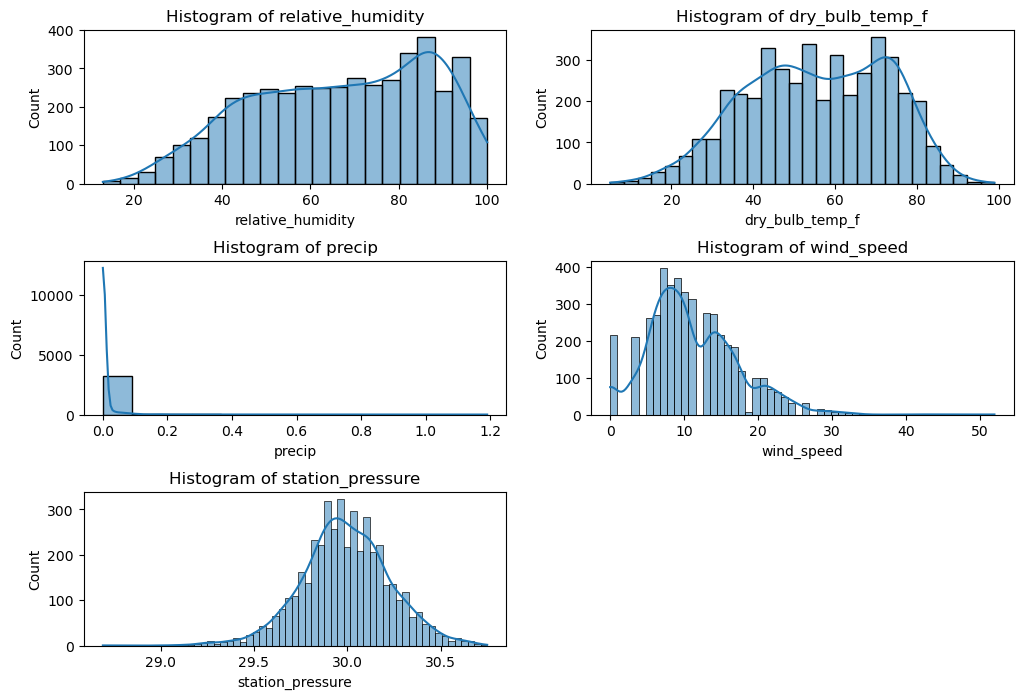

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for variables in the training set using seaborn
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

variables_to_plot = ['relative_humidity', 'dry_bulb_temp_f', 'precip', 'wind_speed', 'station_pressure']

for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_df[variable], kde=True)
    plt.title(f'Histogram of {variable}')

plt.show()


<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


Number of missing or infinite values in 'relative_humidity': 111
Number of infinite values in 'relative_humidity': 0


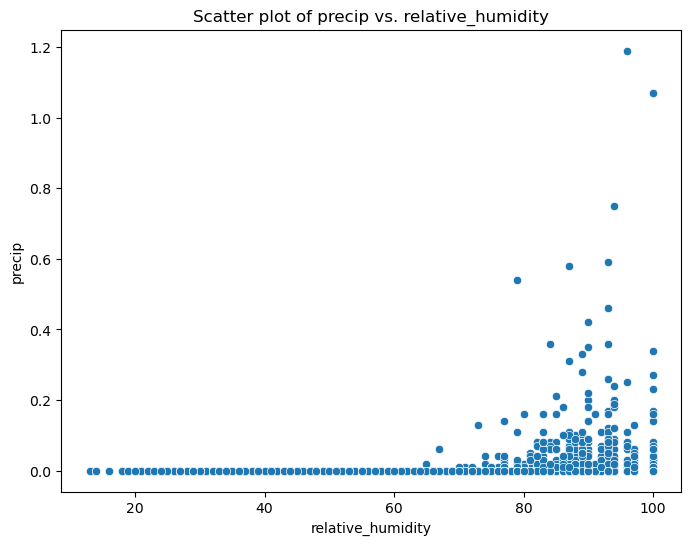

Linear Regression Model: precip ~ relative_humidity
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        22:37:38   Log-Likelihood:                    nan
No. Observations:                4470   AIC:                               nan
Df Residuals:                    4468   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np  # Import NumPy

# Check for missing or infinite values in the predictor variable
print("Number of missing or infinite values in 'relative_humidity':", train_df['relative_humidity'].isna().sum())
print("Number of infinite values in 'relative_humidity':", np.isinf(train_df['relative_humidity']).sum())

# Remove rows with missing or infinite values in 'relative_humidity'
train_df = train_df[~train_df['relative_humidity'].isna() & ~np.isinf(train_df['relative_humidity'])]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['relative_humidity'], y=train_df['precip'])
plt.title('Scatter plot of precip vs. relative_humidity')
plt.xlabel('relative_humidity')
plt.ylabel('precip')

# Add a regression line to the plot
X = sm.add_constant(train_df['relative_humidity'])
model = sm.OLS(train_df['precip'], X).fit()
plt.plot(train_df['relative_humidity'], model.predict(X), color='red', linewidth=2)

plt.show()

# Display the summary of the linear regression model
print("Linear Regression Model: precip ~ relative_humidity")
print(model.summary())


Number of missing or infinite values in 'dry_bulb_temp_f': 0
Number of infinite values in 'dry_bulb_temp_f': 0


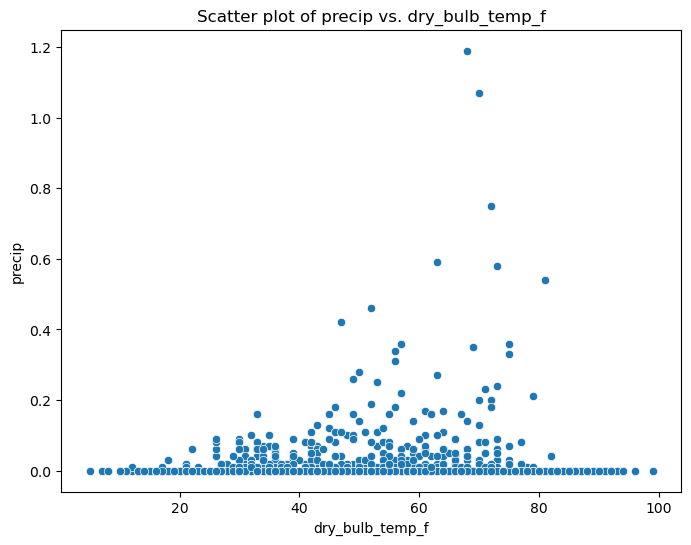

Linear Regression Model: precip ~ dry_bulb_temp_f
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        22:38:18   Log-Likelihood:                    nan
No. Observations:                4470   AIC:                               nan
Df Residuals:                    4468   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Check for missing or infinite values in the predictor variable
print("Number of missing or infinite values in 'dry_bulb_temp_f':", train_df['dry_bulb_temp_f'].isna().sum())
print("Number of infinite values in 'dry_bulb_temp_f':", np.isinf(train_df['dry_bulb_temp_f']).sum())

# Remove rows with missing or infinite values in 'dry_bulb_temp_f'
train_df = train_df[~train_df['dry_bulb_temp_f'].isna() & ~np.isinf(train_df['dry_bulb_temp_f'])]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['dry_bulb_temp_f'], y=train_df['precip'])
plt.title('Scatter plot of precip vs. dry_bulb_temp_f')
plt.xlabel('dry_bulb_temp_f')
plt.ylabel('precip')

# Add a regression line to the plot
X = sm.add_constant(train_df['dry_bulb_temp_f'])
model = sm.OLS(train_df['precip'], X).fit()
plt.plot(train_df['dry_bulb_temp_f'], model.predict(X), color='red', linewidth=2)

plt.show()

# Display the summary of the linear regression model
print("Linear Regression Model: precip ~ dry_bulb_temp_f")
print(model.summary())


Number of missing or infinite values in 'wind_speed': 5
Number of infinite values in 'wind_speed': 0


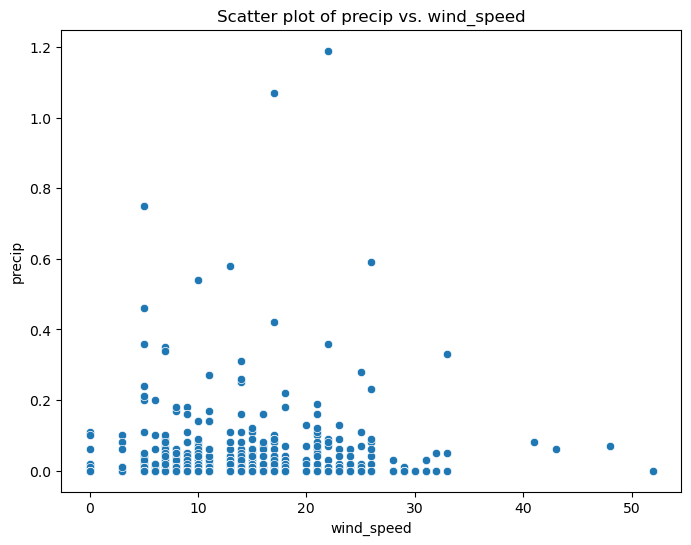

Linear Regression Model: precip ~ wind_speed
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        22:39:15   Log-Likelihood:                    nan
No. Observations:                4465   AIC:                               nan
Df Residuals:                    4463   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Check for missing or infinite values in the predictor variable
print("Number of missing or infinite values in 'wind_speed':", train_df['wind_speed'].isna().sum())
print("Number of infinite values in 'wind_speed':", np.isinf(train_df['wind_speed']).sum())

# Remove rows with missing or infinite values in 'wind_speed'
train_df = train_df[~train_df['wind_speed'].isna() & ~np.isinf(train_df['wind_speed'])]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['wind_speed'], y=train_df['precip'])
plt.title('Scatter plot of precip vs. wind_speed')
plt.xlabel('wind_speed')
plt.ylabel('precip')

# Add a regression line to the plot
X = sm.add_constant(train_df['wind_speed'])
model = sm.OLS(train_df['precip'], X).fit()
plt.plot(train_df['wind_speed'], model.predict(X), color='red', linewidth=2)

plt.show()

# Display the summary of the linear regression model
print("Linear Regression Model: precip ~ wind_speed")
print(model.summary())


Number of missing or infinite values in 'station_pressure': 4
Number of infinite values in 'station_pressure': 0


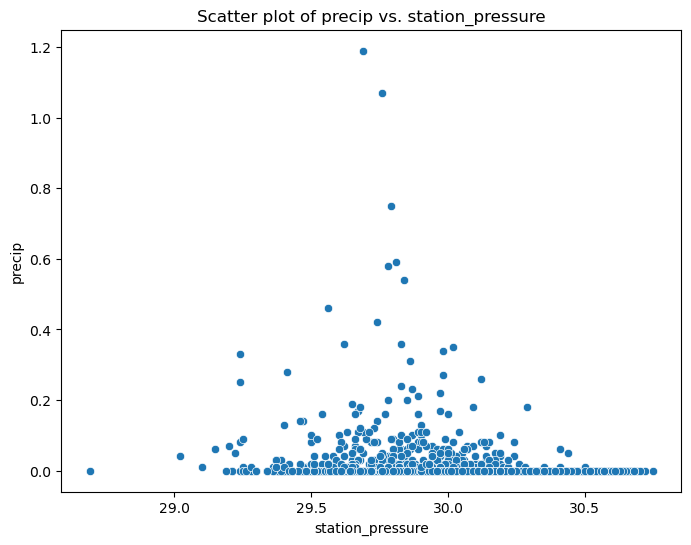

Linear Regression Model: precip ~ station_pressure
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        22:39:54   Log-Likelihood:                    nan
No. Observations:                4461   AIC:                               nan
Df Residuals:                    4459   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Check for missing or infinite values in the predictor variable
print("Number of missing or infinite values in 'station_pressure':", train_df['station_pressure'].isna().sum())
print("Number of infinite values in 'station_pressure':", np.isinf(train_df['station_pressure']).sum())

# Remove rows with missing or infinite values in 'station_pressure'
train_df = train_df[~train_df['station_pressure'].isna() & ~np.isinf(train_df['station_pressure'])]

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['station_pressure'], y=train_df['precip'])
plt.title('Scatter plot of precip vs. station_pressure')
plt.xlabel('station_pressure')
plt.ylabel('precip')

# Add a regression line to the plot
X = sm.add_constant(train_df['station_pressure'])
model = sm.OLS(train_df['precip'], X).fit()
plt.plot(train_df['station_pressure'], model.predict(X), color='red', linewidth=2)

plt.show()

# Display the summary of the linear regression model
print("Linear Regression Model: precip ~ station_pressure")
print(model.summary())


<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


Number of missing or infinite values in 'station_pressure': 0
Number of infinite values in 'station_pressure': 0
Linear Regression Model: precip ~ station_pressure + wind_speed
                            OLS Regression Results                            
Dep. Variable:                 precip   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 16 Dec 2023   Prob (F-statistic):                nan
Time:                        23:19:21   Log-Likelihood:                    nan
No. Observations:                4461   AIC:                               nan
Df Residuals:                    4458   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    st

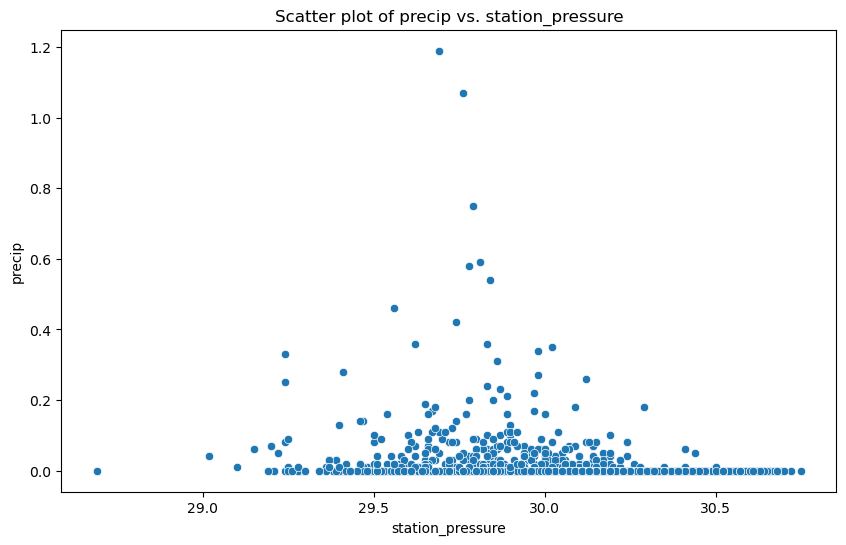

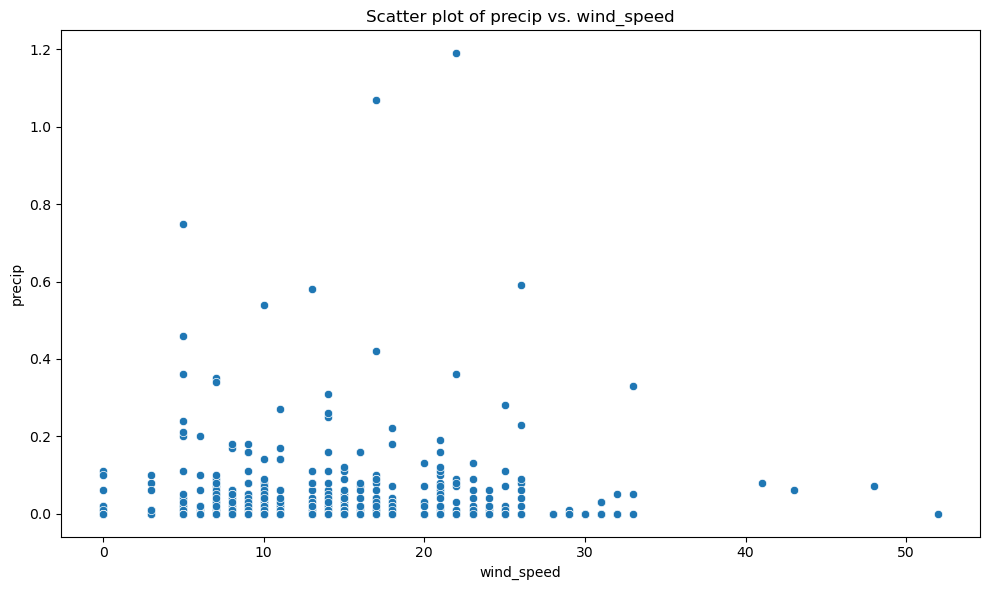

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Function to preprocess data and fit linear regression model
def fit_linear_regression(x_name, y_name):
    # Check for missing or infinite values in the predictor variable
    print(f"Number of missing or infinite values in '{x_name}':", train_df[x_name].isna().sum())
    print(f"Number of infinite values in '{x_name}':", np.isinf(train_df[x_name]).sum())

    # Remove rows with missing or infinite values in the predictor variable
    train_df_clean = train_df[~train_df[x_name].isna() & ~np.isinf(train_df[x_name])]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    sns.scatterplot(x=train_df_clean[x_name], y=train_df_clean[y_name])
    plt.title(f'Scatter plot of {y_name} vs. {x_name}')
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    # Add additional features (e.g., other predictor variable) to improve the model
    other_variable = 'wind_speed' if x_name == 'station_pressure' else 'station_pressure'
    X = sm.add_constant(train_df_clean[[x_name, other_variable]])
    model = sm.OLS(train_df_clean[y_name], X).fit()

    # Display the summary of the linear regression model
    print(f"Linear Regression Model: {y_name} ~ {x_name} + {other_variable}")
    print(model.summary())

# Model Improvement 1: station_pressure
fit_linear_regression('station_pressure', 'precip')

# Model Improvement 2: wind_speed
fit_linear_regression('wind_speed', 'precip')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [100]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming you have models named 'model_station_pressure' and 'model_wind_speed'
models = [model_station_pressure, model_wind_speed]

# Assuming you have testing set features and target variable
# Replace these with your actual variables
X_test = your_features_test
y_test = your_target_test

# Lists to store model names and corresponding metrics
model_names = []
mse_values = []
r2_values = []

# Evaluate models and calculate metrics
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_names.append(str(model))
    mse_values.append(mse)
    r2_values.append(r2)

# Create a comparison table
comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'R-squared': r2_values
})

# Print the comparison table
print(comparison_df)


NameError: name 'model_station_pressure' is not defined

## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
